Text Proccesing - Assignment 7

Classifying text as Biology or Physics related.

Tedi Dika

txd190008


In [462]:
import pandas as pd
df = pd.read_csv('train.csv', header=0, usecols=[1,2], encoding='latin-1')
print('rows and columns:', df.shape)
print(df.head())

rows and columns: (8695, 2)
                                             Comment      Topic
0  A few things. You might have negative- frequen...    Biology
1  Is it so hard to believe that there exist part...    Physics
2                                     There are bees    Biology
3  I'm a medication technician. And that's alot o...    Biology
4                     Cesium is such a pretty metal.  Chemistry


Text Preprocessing

In [463]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=list(stopwords))

# remove all entries with Chemistry topic
df = df[df['Topic'] != 'Chemistry']

# set up X and y
X = df.Comment
y = df.Topic

# take a peek at X
print(X)

0       A few things. You might have negative- frequen...
1       Is it so hard to believe that there exist part...
2                                          There are bees
3       I'm a medication technician. And that's alot o...
6               Shove it up your ass and see what happens
                              ...                        
8689    Thank You - If I assumed it was an electric he...
8690    I make similar observations over the last week...
8691                                      You would know.
8693    What about the ethical delimmas,  groundbreaki...
8694                            I would like to know too.
Name: Comment, Length: 5775, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [464]:
# look at y
y[:10]

0     Biology
1     Physics
2     Biology
3     Biology
6     Biology
8     Biology
9     Biology
11    Biology
12    Biology
15    Biology
Name: Topic, dtype: object

Plotting distribution of classes


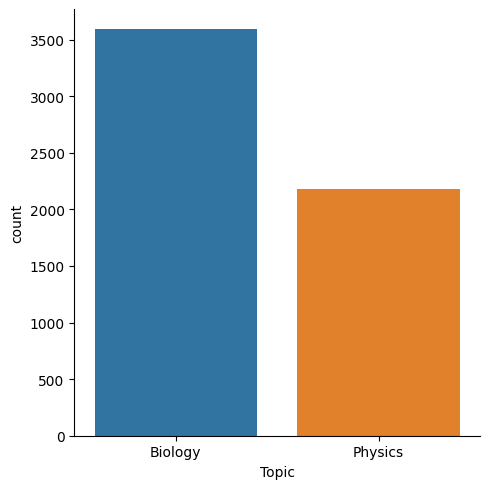

In [465]:
import seaborn as sb
sb.catplot(x="Topic", kind="count", data=df)

The data set is a collection of reddit comments and the model should be able to predict whether the text is related to Biology or Physics

Train and Test sets

In [466]:
# 80% of data set used for training, 20% used for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

X_train.shape

(4620,)

In [467]:
# apply tfidf vectorizer
X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)        # transform only the test data

 Naïve Bayes

In [468]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [469]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
pred = naive_bayes.predict(X_test)
confusion_matrix(y_test, pred)

array([[690,  14],
       [198, 253]])

In [470]:
print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred, pos_label='Physics'))
print('recall score: ', recall_score(y_test, pred, pos_label='Physics'))
print('f1 score: ', f1_score(y_test, pred, pos_label='Physics'))

accuracy score:  0.8164502164502164
precision score:  0.947565543071161
recall score:  0.5609756097560976
f1 score:  0.7047353760445684


Logistical Regression

In [471]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', class_weight='balanced')
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [472]:
pred = classifier.predict(X_test)
confusion_matrix(y_test, pred)

array([[619,  85],
       [121, 330]])

In [473]:
print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred, pos_label='Physics'))
print('recall score: ', recall_score(y_test, pred, pos_label='Physics'))
print('f1 score: ', f1_score(y_test, pred, pos_label='Physics'))

accuracy score:  0.8216450216450216
precision score:  0.7951807228915663
recall score:  0.7317073170731707
f1 score:  0.7621247113163973


Neural Network

In [474]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 7), random_state=1)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 7), random_state=1,
              solver='lbfgs')

In [475]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred, pos_label='Physics'))
print('recall score: ', recall_score(y_test, pred, pos_label='Physics'))
print('f1 score: ', f1_score(y_test, pred, pos_label='Physics'))

accuracy score:  0.8121212121212121
precision score:  0.76
recall score:  0.7583148558758315
f1 score:  0.7591564927857936


In summary, Naive Bayes had a pretty good accurancy, as I expected, since the data set is relatively small.  Logistical regression performed  slightly better which makes sense because logistic regression is more suited to binary classificaiton. Nueral Networks was the worst of all three. This was surprising for me since I expected it to perform the best out of all three. I believe the network would be able to better identify the 'pattern' of the data if given a much larger data set. Another issue is that the topics of physics and biology can share terminology which adds complexity and might throw off the model.